In [4]:
import os, glob, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
def load_runs(base_dir, potential):
    pattern = os.path.join(base_dir, potential, "*", f"{potential}_*.json")
    rows = []
    for fp in glob.glob(pattern):
        with open(fp, "r") as f:
            d = json.load(f)

        x_max = float(d["x_max"])
        cutoff = int(d["cutoff"])  # number of x-grid points per site (2**n_boson_qubits)

        eig = d.get("eigenvalues", [])
        E0 = float(min(eig)) if len(eig) else np.nan

        rows.append(
            dict(
                x_max=x_max,
                cutoff=cutoff,
                E0=E0,
                file=fp,
            )
        )

    df = pd.DataFrame(rows).sort_values(["cutoff", "x_max"]).reset_index(drop=True)
    return df

def add_target_precision(df, E_target=0.0, eps=1e-16):
    df = df.copy()
    df["E_target"] = float(E_target)
    df["E_err"] = (df["E0"] - df["E_target"]).abs()
    return df
    
def plot_error_vs_xmax(df, E_target, potential):

    dfp = add_target_precision(df, E_target)
    plt.figure(figsize=(16, 5))

    # one curve per cutoff
    for cutoff, g in dfp.groupby("cutoff"):
        g = g.sort_values("x_max")
        plt.semilogy(g["x_max"], g["E_err"], marker="o", linewidth=2,
                     label=f"cutoff={cutoff}")

    plt.xlabel(r"$x_{\max}$")
    plt.ylabel(r"$|\Delta E|$")
    plt.title(f"{potential}")
    plt.grid(True, which="both", linestyle="--", alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [30]:
base_dir = r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\Analyses\Model Checks\X-Sweep\HamiltonianData-XSweep"   
potential = "QHO"

df = load_runs(base_dir, potential=potential)


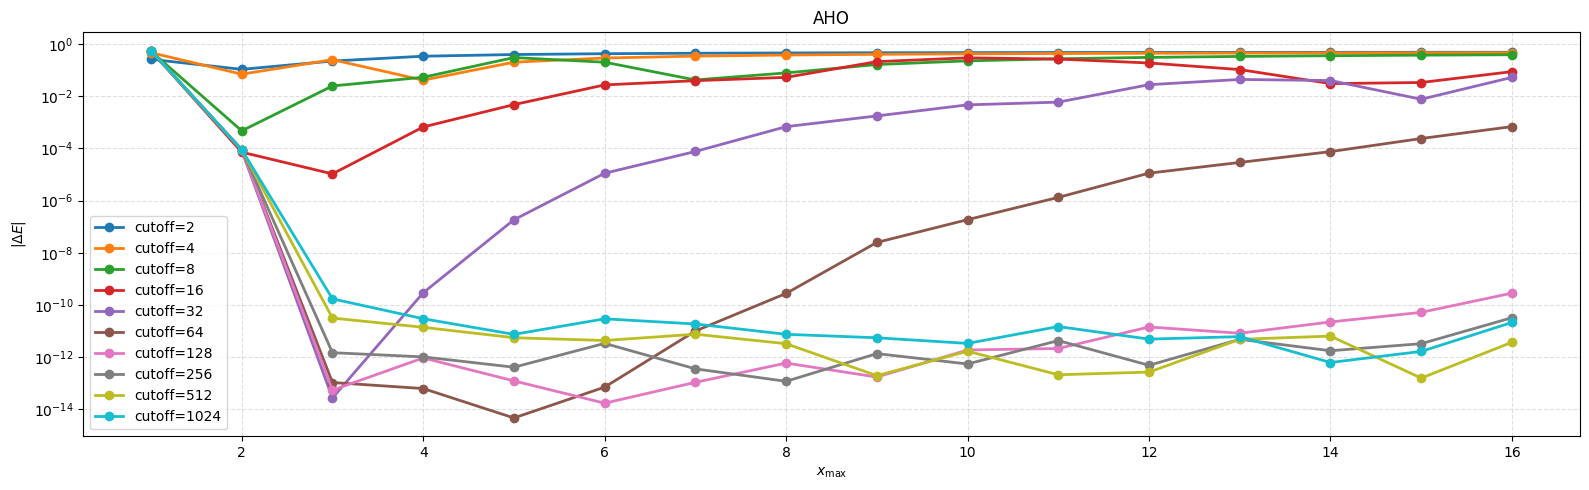

In [29]:
plot_error_vs_xmax(df, E_target=0.0, potential=potential)

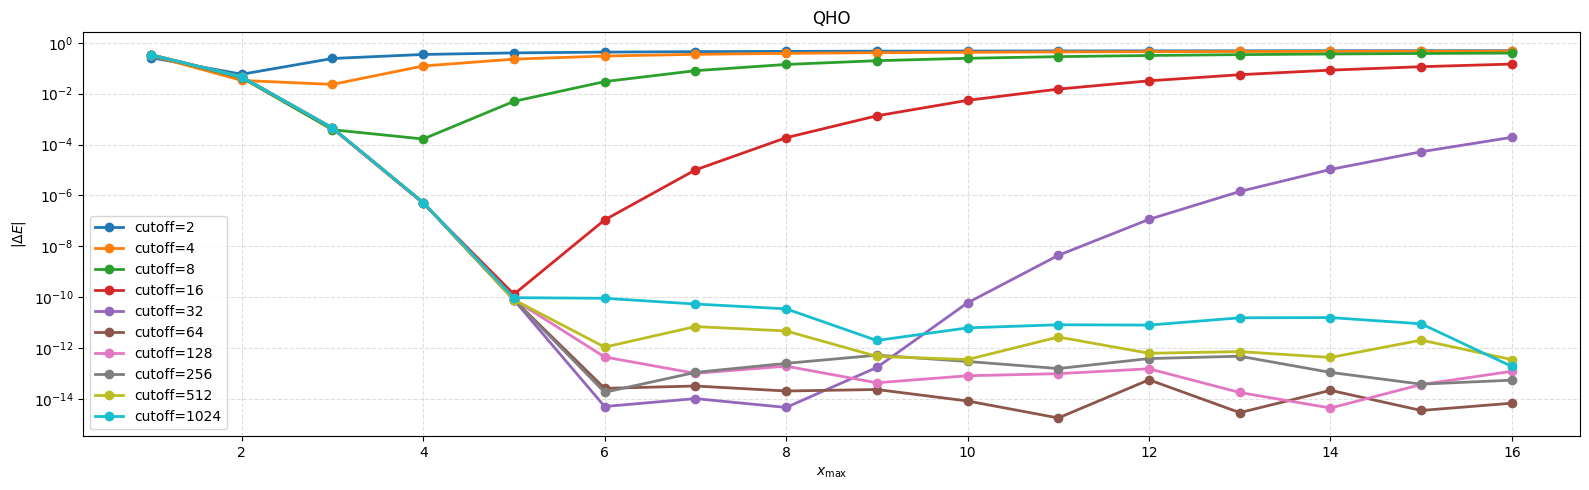

In [31]:
plot_error_vs_xmax(df, E_target=0.0, potential=potential)

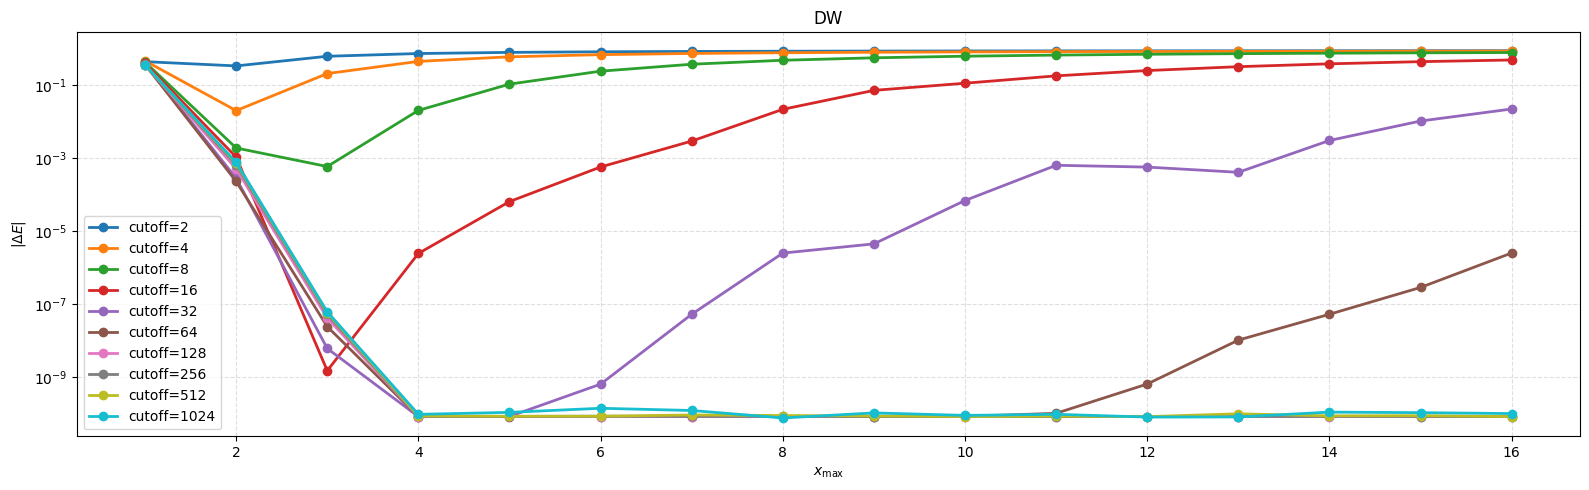

In [27]:
plot_error_vs_xmax(df, E_target=0.8916323802192221, potential=potential)